In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

# Data Wrangling

In [2]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [3]:
missing_data = df.isna().sum()
missing_data

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

## There are no missing data

In [4]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

## We will convert the Date column to DateTime datatype and (Time, State and Group) to string datatype

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [7]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [8]:
cols = list(df.select_dtypes(np.object_).columns)

In [9]:
df[cols] = df[cols].astype('string')

In [10]:
df.dtypes

Date     datetime64[ns]
Time     string[python]
State    string[python]
Group    string[python]
Unit              int64
Sales             int64
dtype: object

In [11]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [12]:
df['State'].unique()

<StringArray>
[' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS']
Length: 7, dtype: string

In [13]:
df['Group'].unique()

<StringArray>
[' Kids', ' Men', ' Women', ' Seniors']
Length: 4, dtype: string

In [14]:
df['Time'].unique()

<StringArray>
[' Morning', ' Afternoon', ' Evening']
Length: 3, dtype: string

### all string values are uniform 



## Normalizing data using Min-Max method

In [15]:
df['MM_Sales'] = (df['Sales']-df['Sales'].min())/(df['Sales'].max()-df['Sales'].min())

In [16]:
df['MM_Sales']

0       0.095238
1       0.095238
2       0.031746
3       0.206349
4       0.015873
          ...   
7555    0.190476
7556    0.206349
7557    0.206349
7558    0.142857
7559    0.174603
Name: MM_Sales, Length: 7560, dtype: float64

## Grouping of data on basis of 'Group' and 'State' column

In [17]:
group_sales = df.groupby('Group')
state_sales = df.groupby('State')

# Data Analysis

In [18]:
group_sales.describe()['Sales']

,count,mean,min,25%,50%,75%,max,std
Group,,,,,,,,
Kids,1890.0,45011.904762,5000.0,20000.0,35000.0,65000.0,162500.0,31871.491085
Men,1890.0,45370.370370,5000.0,20000.0,35000.0,65000.0,160000.0,32177.180712
Seniors,1890.0,44464.285714,5000.0,20000.0,35000.0,62500.0,162500.0,32195.360017
Women,1890.0,45207.671958,5000.0,20000.0,35000.0,67500.0,162500.0,32781.639869


<Axes: >

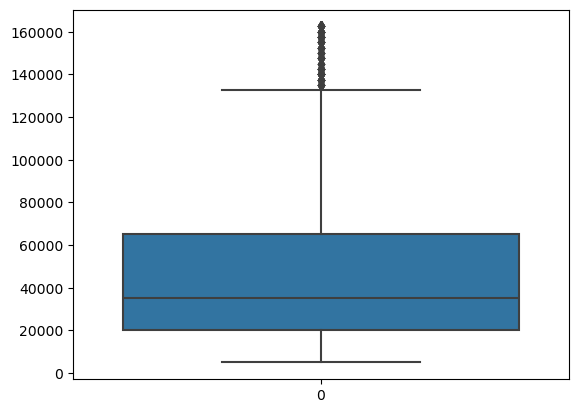

In [19]:
sns.boxplot(df['Sales'])

In [20]:
group_sales.describe()['Unit']

,count,mean,min,25%,50%,75%,max,std
Group,,,,,,,,
Kids,1890.0,18.004762,2.0,8.0,14.0,26.0,65.0,12.748596
Men,1890.0,18.148148,2.0,8.0,14.0,26.0,64.0,12.870872
Seniors,1890.0,17.785714,2.0,8.0,14.0,25.0,65.0,12.878144
Women,1890.0,18.083069,2.0,8.0,14.0,27.0,65.0,13.112656


<Axes: >

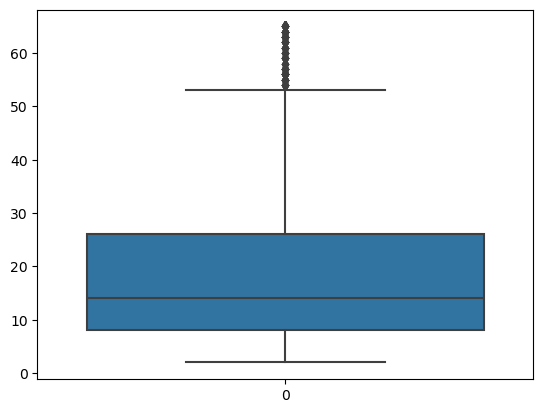

In [21]:
sns.boxplot(df['Unit'])

## Highest and lowest Sales by Group:

### - Highest Sales were made by Kids, Senior and Women groups of $162500 by selling 65 units each

### - Lowest Sale was made by Men group of $160000 by selling 64 units


<h4><h4>

In [22]:
state_sales.describe()['Sales']

,count,mean,min,25%,50%,75%,max,std
State,,,,,,,,
NSW,1080.0,69416.666667,30000.0,52500.0,70000.0,85000.0,112500.0,20626.651646
NT,1080.0,20907.407407,5000.0,15000.0,20000.0,27500.0,37500.0,8961.907893
QLD,1080.0,30942.129630,7500.0,20000.0,30000.0,40000.0,62500.0,13344.638002
SA,1080.0,54497.685185,25000.0,40000.0,52500.0,67500.0,87500.0,17460.965183
TAS,1080.0,21074.074074,5000.0,15000.0,20000.0,27500.0,37500.0,9024.684205
VIC,1080.0,97745.370370,50000.0,77500.0,95000.0,112500.0,162500.0,26621.597092
WA,1080.0,20511.574074,5000.0,12500.0,20000.0,27500.0,37500.0,9231.905897


In [23]:
state_sales.describe()['Unit']

,count,mean,min,25%,50%,75%,max,std
State,,,,,,,,
NSW,1080.0,27.766667,12.0,21.0,28.0,34.0,45.0,8.250661
NT,1080.0,8.362963,2.0,6.0,8.0,11.0,15.0,3.584763
QLD,1080.0,12.376852,3.0,8.0,12.0,16.0,25.0,5.337855
SA,1080.0,21.799074,10.0,16.0,21.0,27.0,35.0,6.984386
TAS,1080.0,8.429630,2.0,6.0,8.0,11.0,15.0,3.609874
VIC,1080.0,39.098148,20.0,31.0,38.0,45.0,65.0,10.648639
WA,1080.0,8.204630,2.0,5.0,8.0,11.0,15.0,3.692762


## Highest and lowest Sales by States:

### - Highest Sales were made by VIC State of $162500 by selling 65 units

### - Lowest Sale was made by (NT, TAS, WA) states of $37500 by selling 15 units each

<h4> <h4>

## Weekly, Monthly and Quaterly repory

### By Groups:

In [24]:
weekly_sales = group_sales.resample('W', on='Date')['Sales'].sum()
monthly_sales = group_sales.resample('M', on='Date')['Sales'].sum()
quaterly_sales = group_sales.resample('M', on='Date')['Sales'].sum()

In [25]:
weekly_sales

Group     Date      
 Kids     2020-10-04    3690000
          2020-10-11    7020000
          2020-10-18    6707500
          2020-10-25    6525000
          2020-11-01    5490000
          2020-11-08    5125000
          2020-11-15    5315000
          2020-11-22    5302500
          2020-11-29    5577500
          2020-12-06    7362500
          2020-12-13    8030000
          2020-12-20    7765000
          2020-12-27    7630000
          2021-01-03    3532500
 Men      2020-10-04    3730000
          2020-10-11    6807500
          2020-10-18    6710000
          2020-10-25    6872500
          2020-11-01    5507500
          2020-11-08    5335000
          2020-11-15    5242500
          2020-11-22    5025000
          2020-11-29    5482500
          2020-12-06    7505000
          2020-12-13    7802500
          2020-12-20    7990000
          2020-12-27    8337500
          2021-01-03    3402500
 Seniors  2020-10-04    3782500
          2020-10-11    6737500
          2020-10-1

In [26]:
monthly_sales

Group     Date      
 Kids     2020-10-31    28635000
          2020-11-30    22882500
          2020-12-31    33555000
 Men      2020-10-31    28885000
          2020-11-30    22615000
          2020-12-31    34250000
 Seniors  2020-10-31    28565000
          2020-11-30    22322500
          2020-12-31    33150000
 Women    2020-10-31    28205000
          2020-11-30    22862500
          2020-12-31    34375000
Name: Sales, dtype: int64

In [27]:
quaterly_sales

Group     Date      
 Kids     2020-10-31    28635000
          2020-11-30    22882500
          2020-12-31    33555000
 Men      2020-10-31    28885000
          2020-11-30    22615000
          2020-12-31    34250000
 Seniors  2020-10-31    28565000
          2020-11-30    22322500
          2020-12-31    33150000
 Women    2020-10-31    28205000
          2020-11-30    22862500
          2020-12-31    34375000
Name: Sales, dtype: int64

## By States:

In [28]:
weekly_sales_by_states = state_sales.resample('W', on='Date')['Sales'].sum()
monthly_sales_by_states = state_sales.resample('M', on='Date')['Sales'].sum()
quaterly_sales_by_states = state_sales.resample('Q', on='Date')['Sales'].sum()

In [29]:
pd.options.display.max_rows = None
weekly_sales_by_states

State  Date      
 NSW   2020-10-04     3382500
       2020-10-11     5892500
       2020-10-18     5717500
       2020-10-25     5922500
       2020-11-01     4822500
       2020-11-08     4915000
       2020-11-15     4957500
       2020-11-22     4987500
       2020-11-29     5147500
       2020-12-06     6277500
       2020-12-13     6807500
       2020-12-20     6647500
       2020-12-27     6522500
       2021-01-03     2970000
 NT    2020-10-04     1052500
       2020-10-11     1937500
       2020-10-18     1935000
       2020-10-25     1907500
       2020-11-01     1520000
       2020-11-08     1150000
       2020-11-15     1247500
       2020-11-22     1282500
       2020-11-29     1267500
       2020-12-06     1937500
       2020-12-13     2145000
       2020-12-20     2232500
       2020-12-27     2032500
       2021-01-03      932500
 QLD   2020-10-04     1627500
       2020-10-11     2545000
       2020-10-18     2637500
       2020-10-25     2592500
       2020-11-01     

In [30]:
monthly_sales_by_states

State  Date      
 NSW   2020-10-31    25007500
       2020-11-30    21490000
       2020-12-31    28472500
 NT    2020-10-31     8222500
       2020-11-30     5257500
       2020-12-31     9100000
 QLD   2020-10-31    11120000
       2020-11-30     8110000
       2020-12-31    14187500
 SA    2020-10-31    20610000
       2020-11-30    15532500
       2020-12-31    22715000
 TAS   2020-10-31     8015000
       2020-11-30     5545000
       2020-12-31     9200000
 VIC   2020-10-31    33442500
       2020-11-30    29530000
       2020-12-31    42592500
 WA    2020-10-31     7872500
       2020-11-30     5217500
       2020-12-31     9062500
Name: Sales, dtype: int64

In [31]:
quaterly_sales_by_states

State  Date      
 NSW   2020-12-31     74970000
 NT    2020-12-31     22580000
 QLD   2020-12-31     33417500
 SA    2020-12-31     58857500
 TAS   2020-12-31     22760000
 VIC   2020-12-31    105565000
 WA    2020-12-31     22152500
Name: Sales, dtype: int64

# Data Visualization

Text(0, 0.5, 'Total Sales')

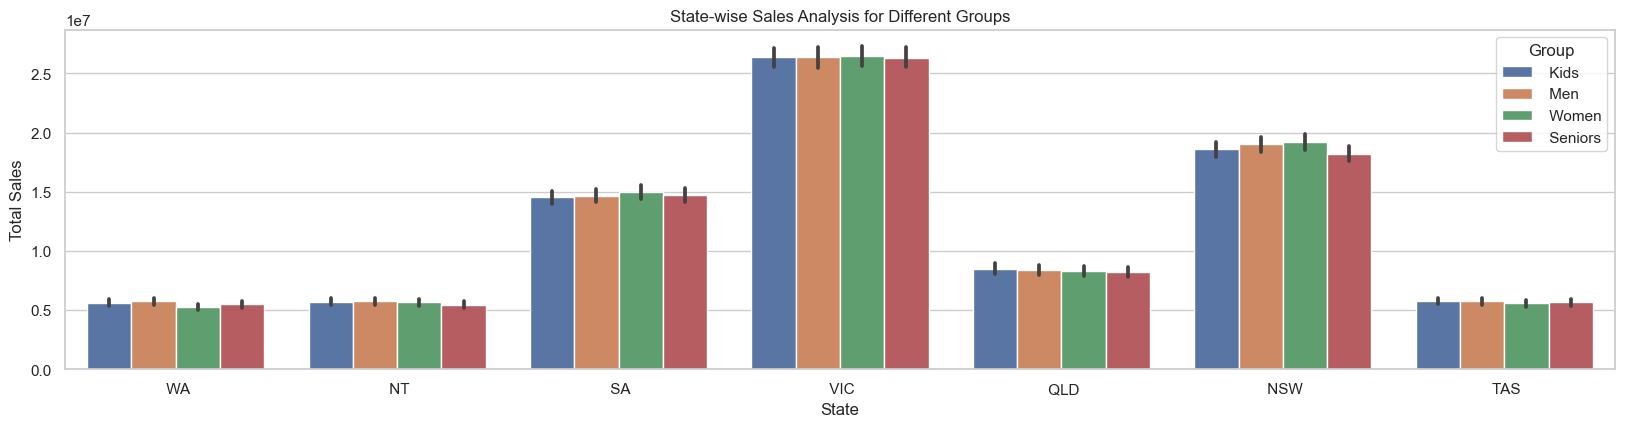

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
sns.barplot(x='State', y='Sales', hue='Group', data=df, estimator=sum)
plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

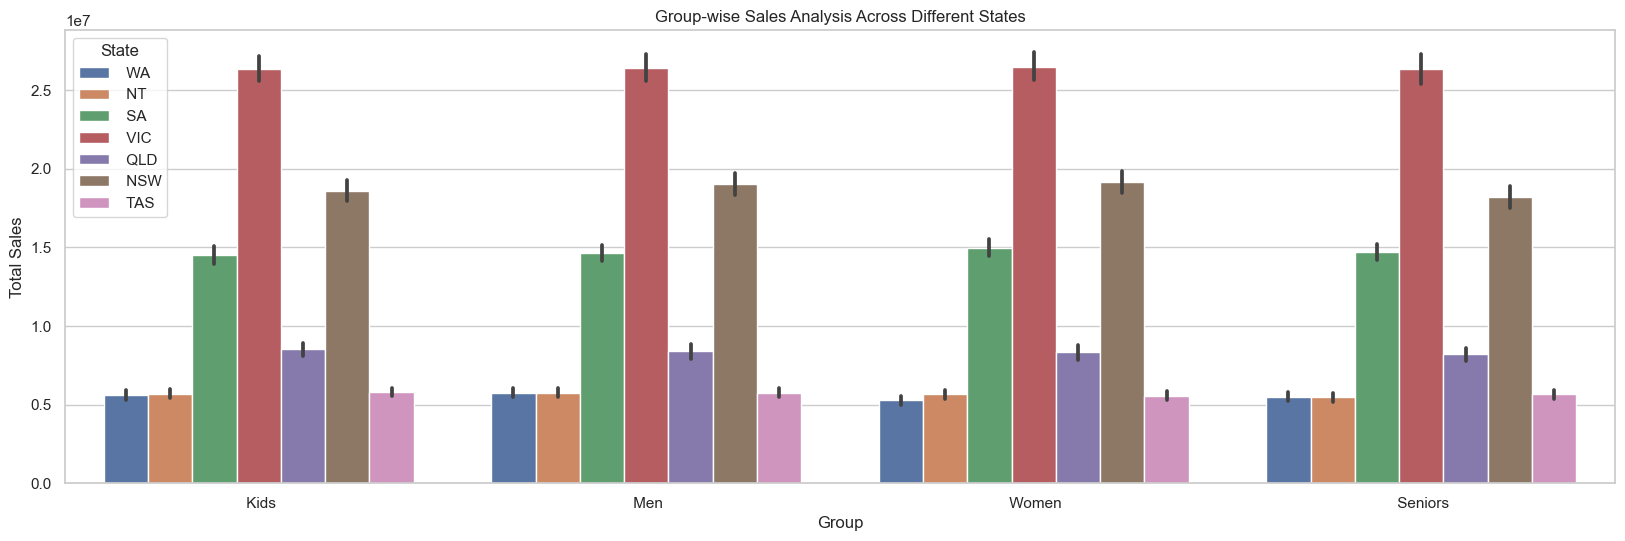

In [33]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 1, 2)
sns.barplot(x='Group', y='Sales', hue='State', data=df, estimator=sum)
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

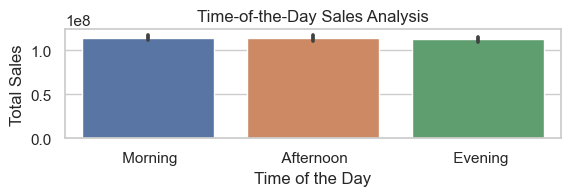

In [34]:
# Time-of-the-Day Analysis
plt.subplot(3, 1, 2)
sns.barplot(x='Time', y='Sales', data=df, estimator=sum)
plt.title('Time-of-the-Day Sales Analysis')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')

C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


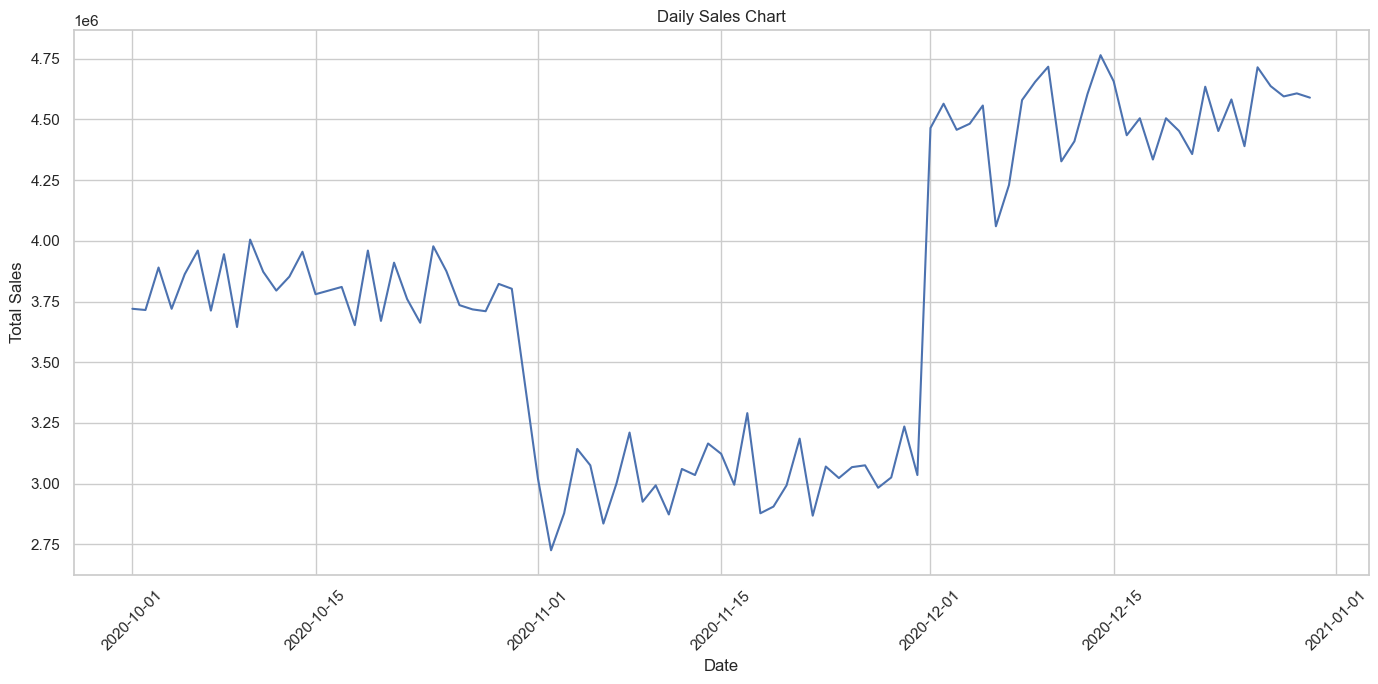

In [35]:
# Daily Sales Chart
plt.figure(figsize=(14, 7))
daily_sales = df.groupby(df['Date'])['Sales'].sum()
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Daily Sales Chart')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.gca().xaxis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


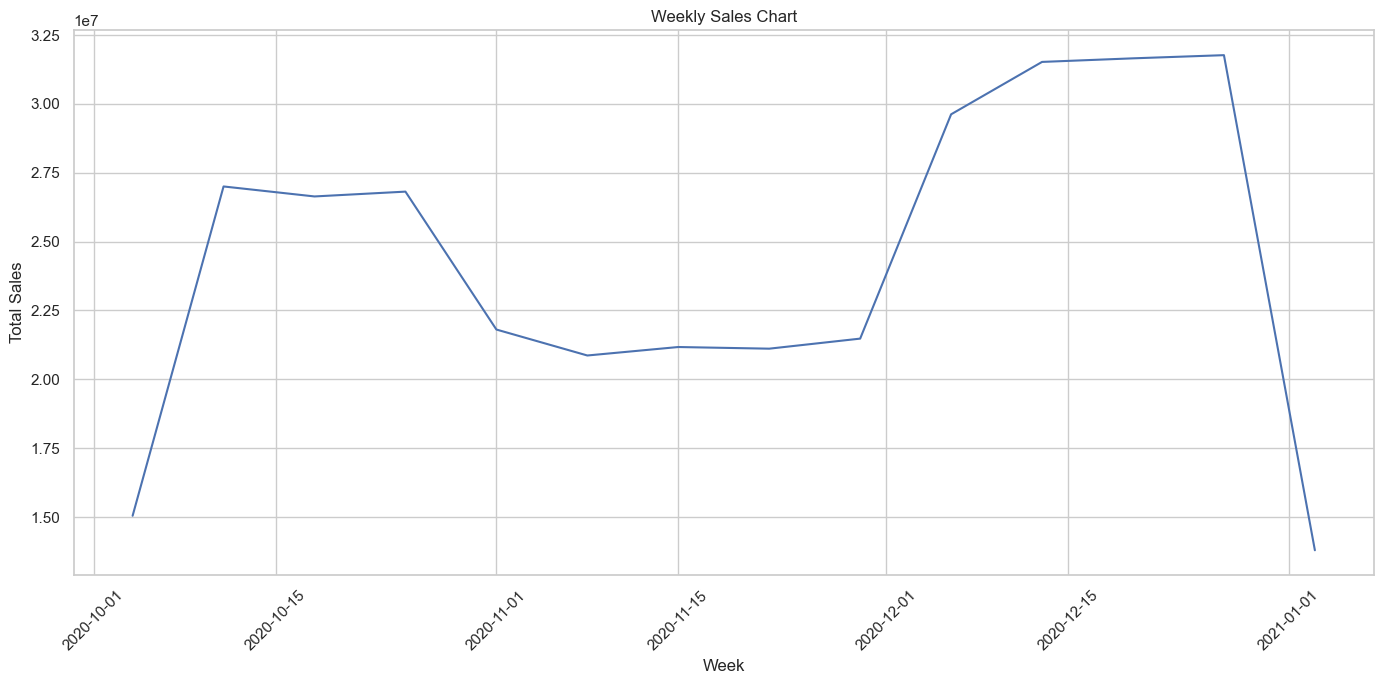

In [36]:
# Weekly Sales Chart
plt.figure(figsize=(14, 7))
weekly_sales = df.resample('W', on='Date')['Sales'].sum()
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title('Weekly Sales Chart')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.gca().xaxis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


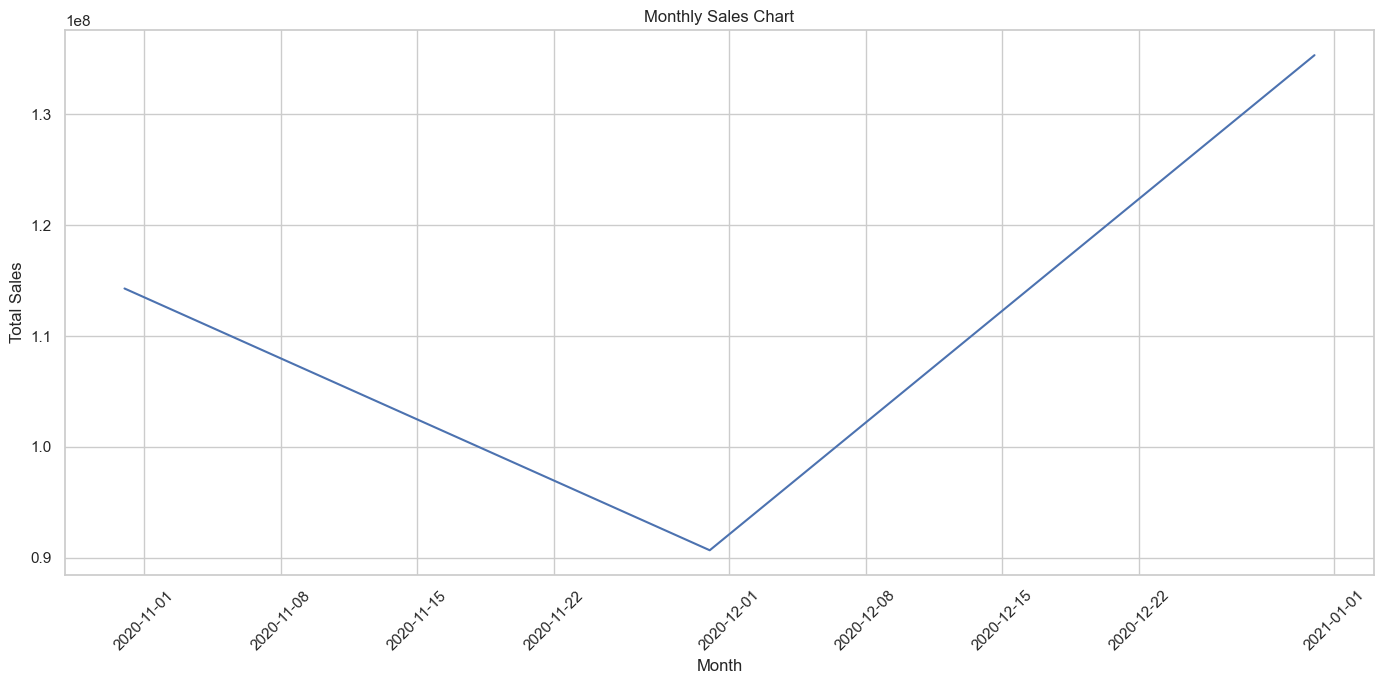

In [37]:
# Monthly Sales Chart
plt.figure(figsize=(14, 7))
monthly_sales = df.resample('M', on='Date')['Sales'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Chart')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.gca().xaxis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


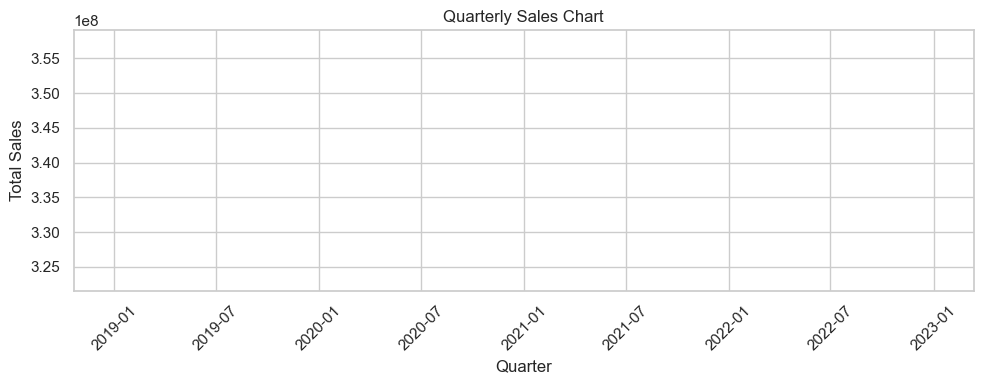

In [38]:
plt.figure(figsize=(10, 4))
quarterly_sales = df.resample('Q', on='Date')['Sales'].sum()
sns.lineplot(x=quarterly_sales.index, y=quarterly_sales.values)
plt.title('Quarterly Sales Chart')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.gca().xaxis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sales highest between 2020-12-01 to 2021-01-01 
### Sales lowest between 2020-10-01 to 2021-11-01 